In [1]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [3]:
df = pd.read_csv('/content/car_evaluation.csv', header=None)

In [4]:
df.shape

(1728, 7)

In [5]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
X = df.drop(['class'], axis=1)
y = df['class']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [9]:
X_train.shape, X_test.shape

((1036, 6), (692, 6))

In [10]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
615,high,high,4,more,med,low
294,vhigh,med,4,more,big,low
712,high,med,4,4,small,med
1720,low,low,5more,more,small,med
88,vhigh,vhigh,5more,2,big,med


In [11]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,high,high,4,2,med,high
1201,med,low,2,4,med,med
628,high,high,5more,2,big,med
1498,low,high,5more,4,med,med
1263,med,low,4,more,med,low


In [12]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [13]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
615,1,1,1,1,1,1
294,2,2,1,1,2,1
712,1,2,1,2,3,2
1720,3,3,2,1,3,2
88,2,4,2,3,2,2


In [14]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,1,1,1,3,1,3
1201,4,3,4,2,1,2
628,1,1,2,3,2,2
1498,3,1,2,2,1,2
1263,4,3,1,1,1,1


In [15]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [16]:
y_pred_en = clf_en.predict(X_test)

In [17]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7890


In [18]:
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [19]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7934


In [20]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7934
Test set score: 0.7890


[Text(0.4, 0.875, 'x[5] <= 1.5\nentropy = 1.193\nsamples = 1036\nvalue = [228, 40, 730, 38]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 342\nvalue = [0, 0, 342, 0]'),
 Text(0.6, 0.625, 'x[3] <= 2.5\nentropy = 1.463\nsamples = 694\nvalue = [228, 40, 388, 38]'),
 Text(0.4, 0.375, 'x[0] <= 2.5\nentropy = 1.632\nsamples = 469\nvalue = [228, 40, 163, 38]'),
 Text(0.2, 0.125, 'entropy = 0.991\nsamples = 241\nvalue = [107, 0, 134, 0]'),
 Text(0.6, 0.125, 'entropy = 1.735\nsamples = 228\nvalue = [121, 40, 29, 38]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 225\nvalue = [0, 0, 225, 0]')]

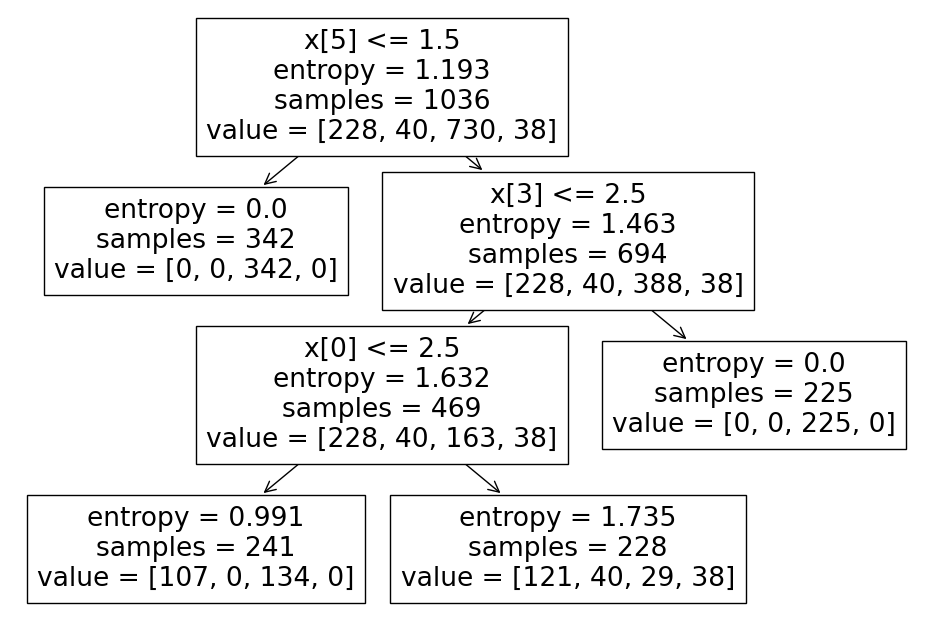

In [21]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train))

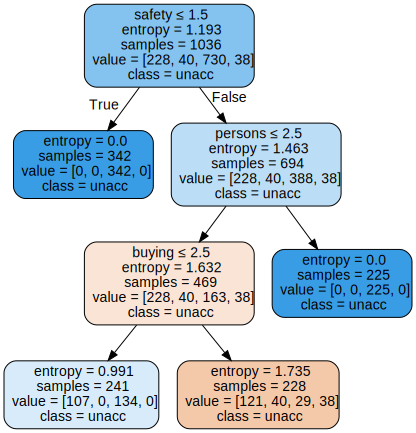

In [22]:
import graphviz
dot_data = tree.export_graphviz(clf_en, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [23]:
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 83   0  73   0]
 [ 29   0   0   0]
 [ 17   0 463   0]
 [ 27   0   0   0]]


In [24]:
f1 = f1_score(y_test, y_pred_en, average='weighted')
print('F1-score: {:.4f}'.format(f1))

F1-score: 0.7521
